
# Random Forest


Nesta tarefa, vocês vão trabalhar com uma base de dados de avaliações de vinhos, onde o objetivo é prever a pontuação dos vinhos usando o algoritmo de Random Forest para classificação multiclasse.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("winequality-red.csv", delimiter=',')

df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


**Vamos conhecer nossa base:**

Características dos Vinhos (Features)

Fixed Acidity: Acidez fixa do vinho.

Volatile Acidity: Acidez volátil do vinho.

Citric Acid: Quantidade de ácido cítrico no vinho.

Residual Sugar: Açúcar residual presente no vinho.

Chlorides: Nível de cloretos no vinho.

Free Sulfur Dioxide: Dióxido de enxofre livre no vinho.

Total Sulfur Dioxide: Quantidade total de dióxido de enxofre no vinho.

Density: Densidade do vinho.

pH: Nível de pH do vinho.

Sulphates: Quantidade de sulfatos no vinho.

Alcohol: Teor alcoólico do vinho.



**Variável de Saída (Target):**

Quality: Pontuação do vinho baseada em dados sensoriais, variando de 0 a 10.


Esta abordagem permitirá que vocês explorem como diferentes características químicas influenciam a qualidade dos vinhos e como o Random Forest pode ser usado para fazer previsões precisas com base nesses dados.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [ ]:
# Verficando os tipos de dados.
print("Tipos de dados:")
print(df.dtypes)

# Verificando a presença de dados faltantes
print("\nContagem de dados faltantes por coluna:")
print(df.isnull().sum())


Tipos de dados:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Contagem de dados faltantes por coluna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


# 2 - Realize a segunda e terceita etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.

B) Verifique o balanceamento da váriavel Target.

C)  Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.

D) Crie um novo dataframe apenas com as váriaveis que parecem ter maior correlação com a target. (Negativa ou positiva)



Análise descritiva dos dados:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.01200

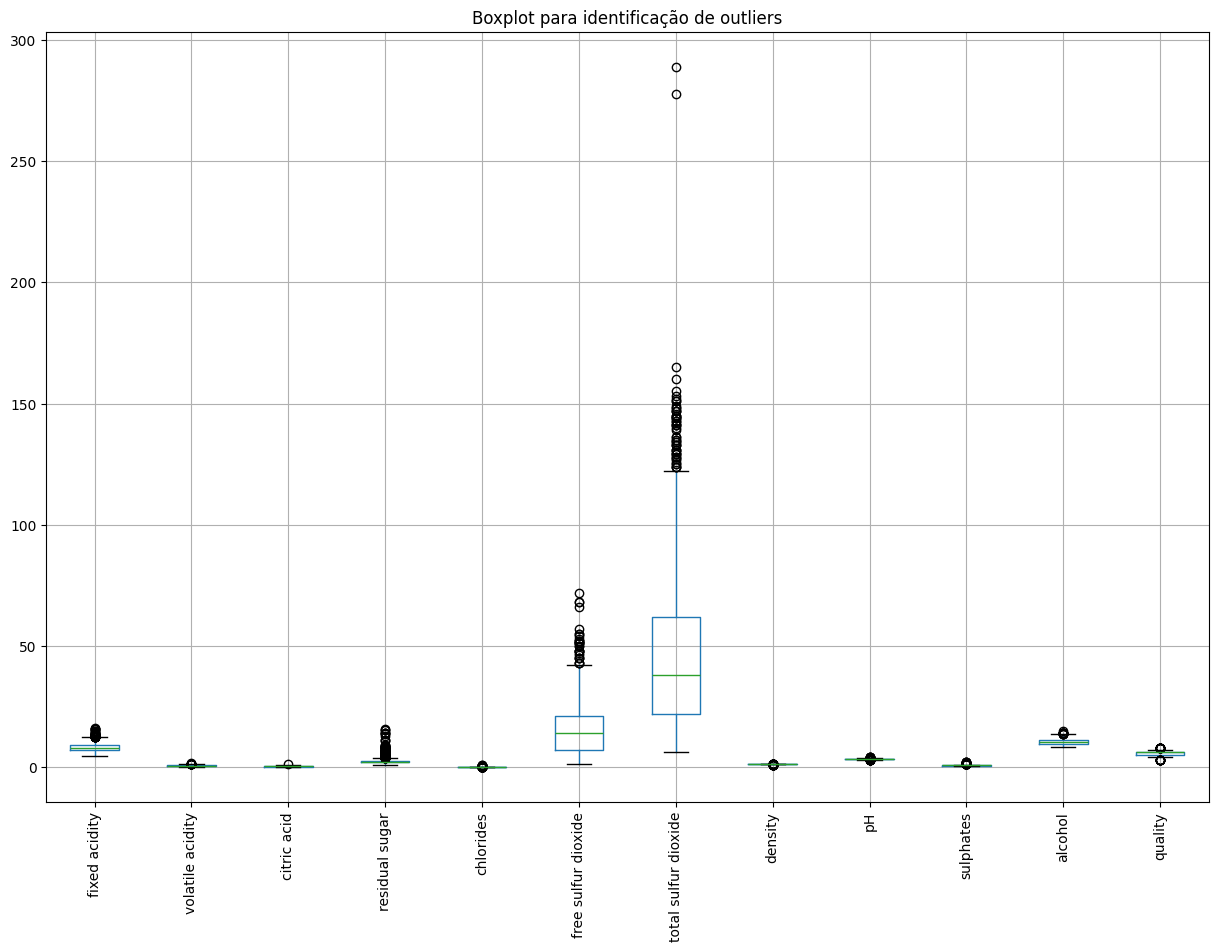

Número inicial de linhas: 1599
Após remover outliers em 'fixed acidity': 1550 linhas restantes
Após remover outliers em 'volatile acidity': 1530 linhas restantes
Após remover outliers em 'citric acid': 1529 linhas restantes
Após remover outliers em 'residual sugar': 1391 linhas restantes
Após remover outliers em 'chlorides': 1289 linhas restantes
Após remover outliers em 'free sulfur dioxide': 1264 linhas restantes
Após remover outliers em 'total sulfur dioxide': 1213 linhas restantes
Após remover outliers em 'density': 1186 linhas restantes
Após remover outliers em 'pH': 1166 linhas restantes
Após remover outliers em 'sulphates': 1140 linhas restantes
Após remover outliers em 'alcohol': 1135 linhas restantes

Número final de linhas após remover outliers em todas as colunas: 1135
Número de linhas removidas: 464

Análise descritiva dos dados após remoção de outliers:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1135.000000       1135.000000  1135.00000

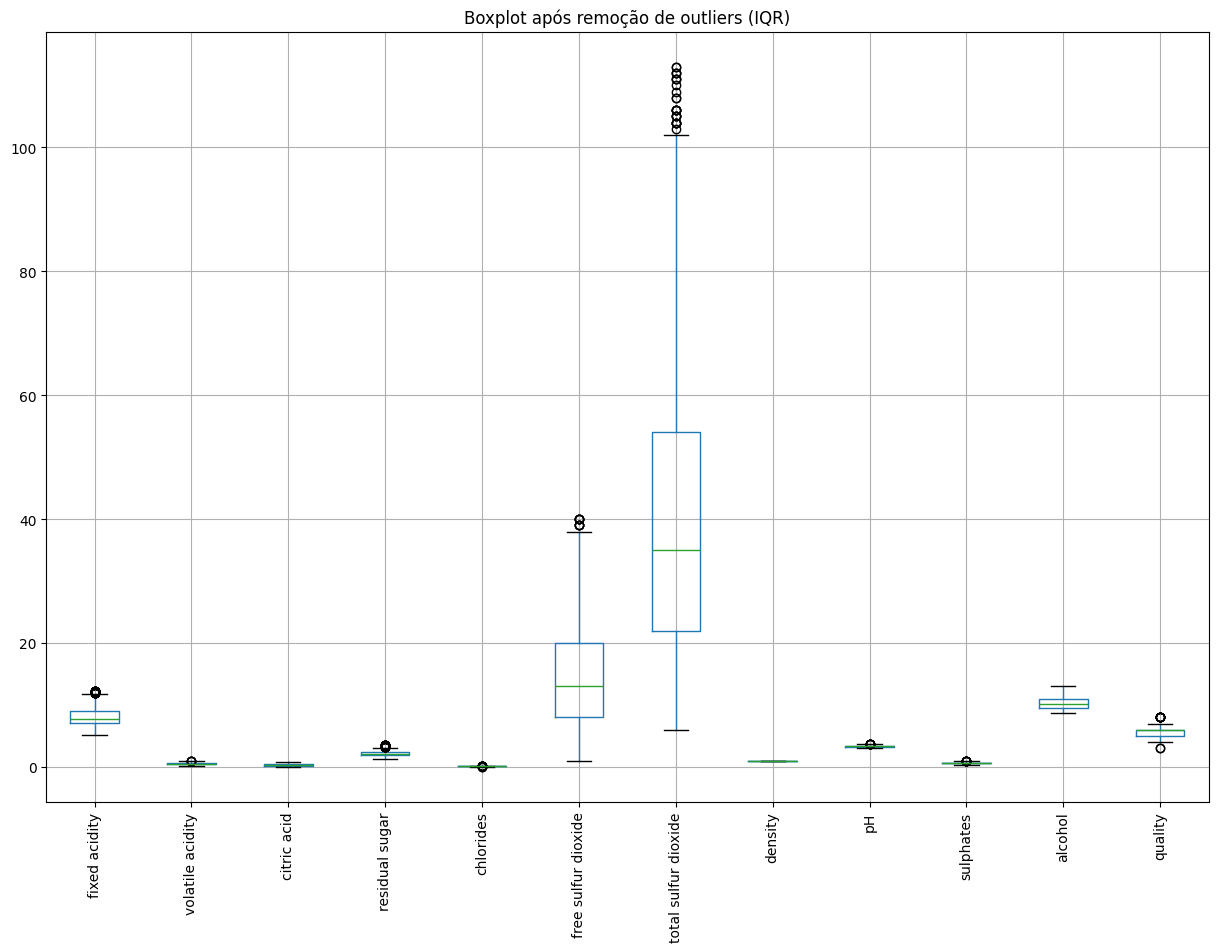


Balanceamento da variável 'quality':
quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

Percentual do balanceamento da variável 'quality':
quality
5    42.589118
6    39.899937
7    12.445278
4     3.314572
8     1.125704
3     0.625391
Name: proportion, dtype: float64

Matriz de Correlação:


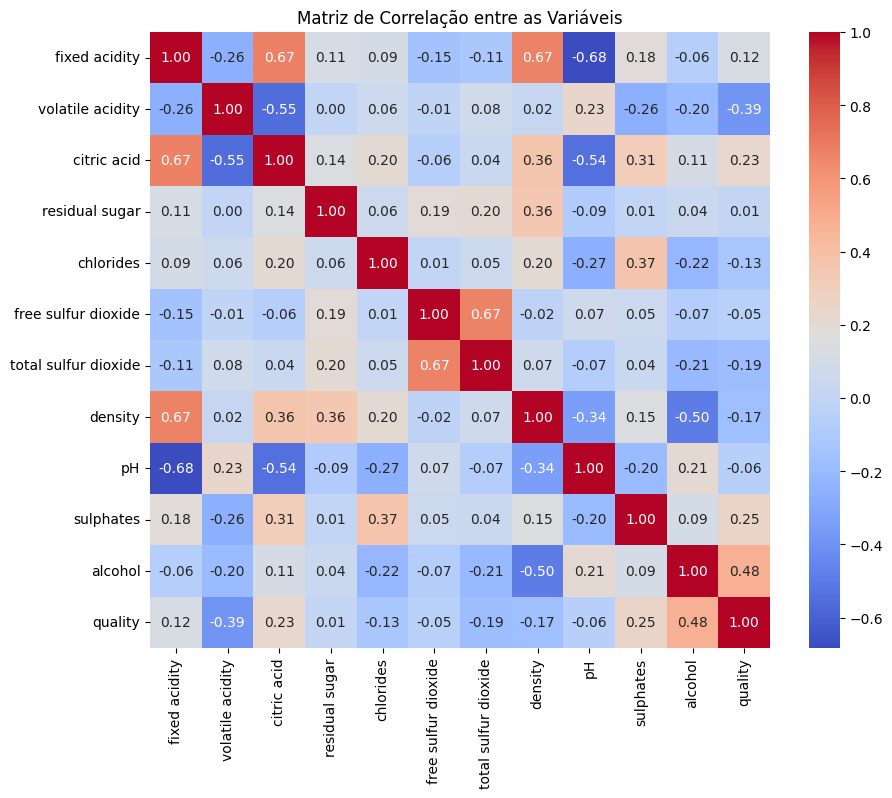


Correlação das variáveis com a variável 'quality':
quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


In [ ]:
# A)
#verificando a presença de otiliers nos dados do data frame
print("\nAnálise descritiva dos dados:")
print(df.describe())

# Verificar a presença de outliers usando boxplots
plt.figure(figsize=(15, 10))
df.boxplot()
plt.title("Boxplot para identificação de outliers")
plt.xticks(rotation=90)
plt.show()

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()
    return df_filtered

# Aplicar a remoção de outliers para cada coluna relevante no dataframe para melhor processamneto dos dados
columns_to_check_outliers = df.columns.tolist() #Verifique todas as colunas
# Remova 'qualidade' desta lista, pois é o alvo e não queremos remover linhas baseadas nele
if 'quality' in columns_to_check_outliers:
    columns_to_check_outliers.remove('quality')

df_cleaned = df.copy()
initial_rows = df_cleaned.shape[0]
print(f"Número inicial de linhas: {initial_rows}")

for col in columns_to_check_outliers:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)
    print(f"Após remover outliers em '{col}': {df_cleaned.shape[0]} linhas restantes")

print(f"\nNúmero final de linhas após remover outliers em todas as colunas: {df_cleaned.shape[0]}")
print(f"Número de linhas removidas: {initial_rows - df_cleaned.shape[0]}")

# Exibir as estatísticas de descrição para o dataframe limpo
print("\nAnálise descritiva dos dados após remoção de outliers:")
print(df_cleaned.describe())

# Plotar boxplots dos dados limpos para inspecionar visualmente a remoção de outliers
plt.figure(figsize=(15, 10))
df_cleaned.boxplot()
plt.title("Boxplot após remoção de outliers (IQR)")
plt.xticks(rotation=90)
plt.show()

# Uma análise mais detalhada coluna por coluna pode ser feita, mas o boxplot geral já indica a presença de muitos outliers na maioria das colunas, como visto pelas "bolinhas" fora das caixas.
# Por exemplo, 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates' e 'alcohol' mostram outliers significativos.

# B)
print("\nBalanceamento da variável 'quality':")
print(df['quality'].value_counts())
print("\nPercentual do balanceamento da variável 'quality':")
print(df['quality'].value_counts(normalize=True) * 100)

print("\nMatriz de Correlação:")
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação entre as Variáveis")
plt.show()

# c)
print("\nCorrelação das variáveis com a variável 'quality':")
print(correlation_matrix['quality'].sort_values(ascending=False))


Variáveis que parecem ter maior correlação com 'quality' (positiva ou negativa):
Alcohol, sulphates, citric acid, fixed acidity, volatile acidity (negativa), chlorides (negativa), total sulfur dioxide (negativa), density (negativa), pH (negativa), residual sugar (negativa), free sulfur dioxide (negativa)
As variáveis com maior magnitude de correlação parecem ser: alcohol, sulphates, citric acid, volatile acidity, total sulfur dioxide, density, chlorides.


In [ ]:
# D)
variables_of_interest = ['alcohol', 'sulphates', 'citric acid', 'volatile acidity',
                         'total sulfur dioxide', 'density', 'chlorides', 'quality']

df_correlated = df[variables_of_interest].copy()

print("\nNovo dataframe com as variáveis mais correlacionadas com 'quality':")
print(df_correlated.head())
print("\nInformações do novo dataframe:")
print(df_correlated.info())



Novo dataframe com as variáveis mais correlacionadas com 'quality':
   alcohol  sulphates  citric acid  volatile acidity  total sulfur dioxide  \
0      9.4       0.56         0.00              0.70                  34.0   
1      9.8       0.68         0.00              0.88                  67.0   
2      9.8       0.65         0.04              0.76                  54.0   
3      9.8       0.58         0.56              0.28                  60.0   
4      9.4       0.56         0.00              0.70                  34.0   

   density  chlorides  quality  
0   0.9978      0.076        5  
1   0.9968      0.098        5  
2   0.9970      0.092        5  
3   0.9980      0.075        6  
4   0.9978      0.076        5  

Informações do novo dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol            

 Com base na matriz de correlação, as variáveis com maior magnitude de correlação com 'quality' são: 'alcohol', 'sulphates', 'citric acid', 'volatile acidity', 'total sulfur dioxide', 'density', 'chlorides'.

# 3 - Preparação Final dos Dados

A) Separe a base em X(Features) e Y(Target)

B) Separe a base em treino e teste.


In [ ]:

# A)
#Separando a base em X(Features) e Y(Target)
X = df_correlated.drop('quality', axis=1)  # Features são todas as colunas exceto 'quality'
y = df_correlated['quality']  # Target é a coluna 'quality'

print("\nPrimeiras 5 linhas de X (Features):")
print(X.head())

print("\nPrimeiras 5 linhas de y (Target):")
print(y.head())

# B)
#Separando a base em treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTamanho do conjunto de treino (X_train): {X_train.shape}")
print(f"Tamanho do conjunto de teste (X_test): {X_test.shape}")
print(f"Tamanho do conjunto de treino (y_train): {y_train.shape}")
print(f"Tamanho do conjunto de teste (y_test): {y_test.shape}")


Primeiras 5 linhas de X (Features):
   alcohol  sulphates  citric acid  volatile acidity  total sulfur dioxide  \
0      9.4       0.56         0.00              0.70                  34.0   
1      9.8       0.68         0.00              0.88                  67.0   
2      9.8       0.65         0.04              0.76                  54.0   
3      9.8       0.58         0.56              0.28                  60.0   
4      9.4       0.56         0.00              0.70                  34.0   

   density  chlorides  
0   0.9978      0.076  
1   0.9968      0.098  
2   0.9970      0.092  
3   0.9980      0.075  
4   0.9978      0.076  

Primeiras 5 linhas de y (Target):
0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

Tamanho do conjunto de treino (X_train): (1279, 7)
Tamanho do conjunto de teste (X_test): (320, 7)
Tamanho do conjunto de treino (y_train): (1279,)
Tamanho do conjunto de teste (y_test): (320,)


# 4 - Modelagem

A) Inicie e treine o modelo de Random Forest

B) Aplique a base de teste o modelo.


In [ ]:
#seu código aqui

# A) Inicie e treine o modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

print("\nTreinando o modelo Random Forest...")
rf_model.fit(X_train, y_train)
print("Treinamento concluído.")

# B) Aplique a base de teste o modelo.
print("\nAplicando o modelo à base de teste...")
y_pred = rf_model.predict(X_test)
print("Previsões na base de teste concluídas.")

print("\nPrimeiras 10 previsões:")
print(y_pred[:10])
print("\nPrimeiros 10 valores reais (y_test):")
print(y_test[:10].values)


Treinando o modelo Random Forest...
Treinamento concluído.

Aplicando o modelo à base de teste...
Previsões na base de teste concluídas.

Primeiras 10 previsões:
[6 6 5 6 5 6 5 5 5 8]

Primeiros 10 valores reais (y_test):
[6 5 5 5 6 6 5 4 6 8]


# 5 - Avaliação

A) Avalie as principais métricas da Claissificação e traga insights acerca do resultado, interprete os valores achados.

B) Você nota que o modelo teve dificuldade para prever alguma classe? Se sim, acredita que tenha relação com o balanceamento dos dados? Explique.



Métricas de Avaliação:
Accuracy: 0.6875

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.72      0.77      0.74       136
           6       0.64      0.72      0.68       128
           7       0.73      0.55      0.63        40
           8       1.00      0.33      0.50         3

    accuracy                           0.69       320
   macro avg       0.52      0.40      0.43       320
weighted avg       0.66      0.69      0.67       320



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


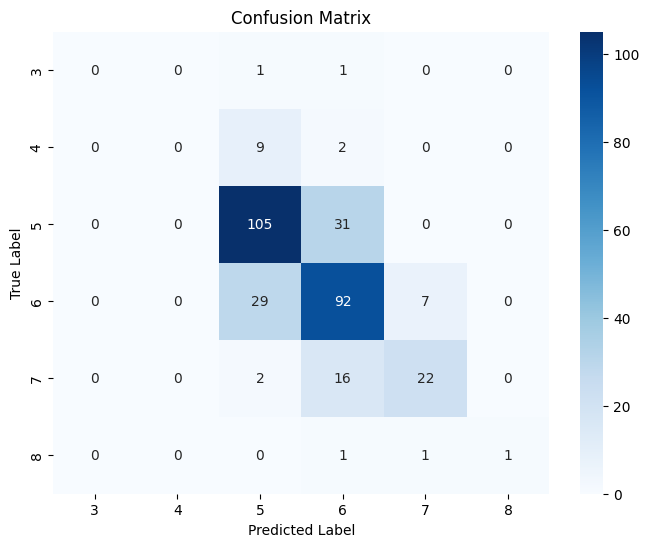

In [ ]:
# A)
# Metricas de Avaliação
print("\nMétricas de Avaliação:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#insights
# Observando o Classification Report, podemos identificar classes onde o modelo performa melhor (maiores F1-scores) e classes onde ele performa pior (menores F1-scores).
# As classes com baixo 'support' (poucas amostras) geralmente apresentam métricas (Precision, Recall, F1-score) mais baixas, pois o modelo tem menos dados para aprender a reconhecê-las.

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Interpretação da Matriz de Confusão:
# - As linhas representam as classes reais (True Label).
# - As colunas representam as classes previstas (Predicted Label).
# - Os valores na diagonal principal mostram o número de acertos para cada classe.
# - Os valores fora da diagonal principal mostram os erros (previsões incorretas). Olhando para estes valores, podemos ver quais classes estão sendo mais confundidas com outras.

# A matriz de confusão visualiza claramente onde o modelo está errando. Se a maioria dos erros de uma classe real está concentrada em uma ou poucas outras classes previstas, isso indica que o modelo está confundindo essas classes específicas. Por exemplo, se muitas amostras da classe '5' real estão sendo previstas como '6', isso é visível na matriz.



Observando o Classification Report e a Matriz de Confusão, geralmente notamos que as classes com menor 'support' (as classes menos frequentes, como 3, 4, 7, 8 e até 5 e 6 em certa medida, dependendo da proporção exata no split de teste) tendem a ter Precision, Recall e F1-scores significativamente mais baixos em comparação com as classes mais frequentes (como 5 e 6).


O modelo geralmente demonstra dificuldade em prever as classes minoritárias (aquelas com menor número de amostras). Isso é claramente visível nos baixos valores de Precision, Recall e F1-score para classes como 3, 4, 7 e 8 (se presentes na base de teste) no Classification Report. Na matriz de confusão, vemos poucos acertos na diagonal para essas classes minoritárias, e muitas vezes suas amostras reais são classificadas incorretamente como as classes majoritárias (como 5 ou 6).

Existe uma relação bem clara entre a dificuldade que um modelo tem para prever classes minoritarias e o desbalanceamento dos dados. Em conjuntos de dados onde há muito mais exemplos de uma classe do que de outra, modelos como o Random Forest acabam "aprendendo" mais sobre as clsses majoritárias. Isso acontece porque, ao acertar a maioria que já representa grande parte dos dados, o modelo alcança uma boa acurácia geral, mesmo que esteja errando bastante nas classes menos representadas.

O problema é que, com poucos exemplos das classes minoritárias, o modelo não consegue aprender bem os padrões que as diferenciam. Isso faz com que ele tenha uma tendência a "chutar" a classe majoritaria, mesmo quando deveria prever uma classe minoritaria. Além disso, ele pode não conseguir generalizar bem para novos dados, justamente por não ter visto exemplos suficientes dessas classes durante o treinamento.

Mesmo usando o parâmetro class_weight='balanced' no RandomForestClassifier, que tenta compensar esse desequilíbrio dando mais peso às amostras minoritárias, o desafio ainda persiste especialmente quando essas classes têm pouquíssimos exemplos. Vale lembrar também que, durante o pre-processamento, a remoçãão de outliers pode ter reduzido ainda mais o número de exemplos dessas classes, tornando o problema mais difícil de resolver. Ou seja, o desbalanceamento impacta diretamente a capacidade do modelo de fazer previsões justas e eficazes para todas as classes.


# 5 - Melhorando os Hyperparametros

A) Defina o Grid de parametros que você quer testar

B) Inicie e Treine um novo modelo utilizando o random search.

C) Avalie os resultados do modelo.

D) Você identificou melhorias no modelo após aplicar o random search? Justifique.


ps. Essa parte da atividade demorará um pouco para rodar!


Iniciando o RandomizedSearchCV para encontrar os melhores hiperparâmetros...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
RandomizedSearchCV concluído.

Melhores parâmetros encontrados pelo RandomizedSearchCV:
{'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'criterion': 'gini', 'bootstrap': True}

Avaliando o modelo com os melhores parâmetros na base de teste...

Métricas de Avaliação do Modelo Tunado:
Accuracy: 0.690625


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.73      0.77      0.75       136
           6       0.65      0.71      0.68       128
           7       0.67      0.60      0.63        40
           8       1.00      0.33      0.50         3

    accuracy                           0.69       320
   macro avg       0.51      0.40      0.43       320
weighted avg       0.66      0.69      0.68       320



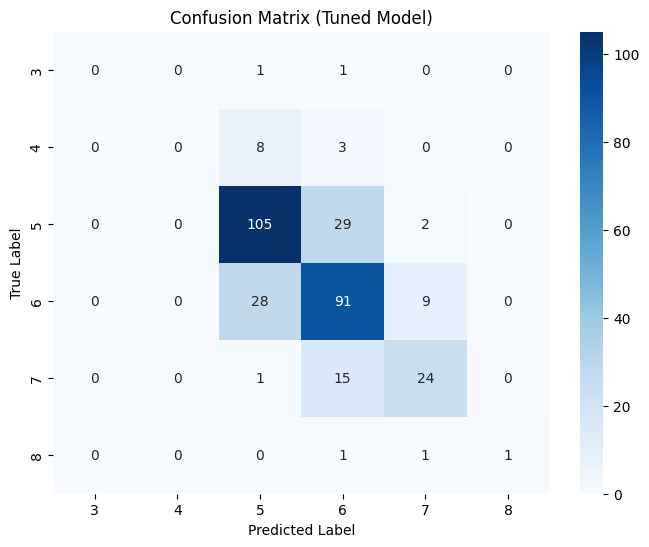


Análise de Melhoria após Random Search:
Acurácia Original: 0.6875
Acurácia Tunada: 0.6906

Comparativo de F1-score (weighted average):
F1-score Original: 0.6713
F1-score Tunado: 0.6752

Comparativo de Métricas por Classe:
Classe | Original F1 | Tunado F1 | Original Support
-------|-------------|-----------|-----------------
3      | 0.0000      | 0.0000    | 2.0
4      | 0.0000      | 0.0000    | 11.0
5      | 0.7447      | 0.7527    | 136.0
6      | 0.6790      | 0.6791    | 128.0
7      | 0.6286      | 0.6316    | 40.0
8      | 0.5000      | 0.5000    | 3.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [ ]:
# A) Defina o Grid de parametros que você quer testar
param_grid = {
    'n_estimators': [100, 200, 300, 500, 800, 1000],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# B) Inicie e Treine um novo modelo utilizando o random search.

# Inicializando o modelo Random Forest
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Inicializando o RandomizedSearchCV
# n_iter define o número de diferentes combinações de parâmetros para tentar
# cv define o número de folds na validação cruzada
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                   n_iter=50, cv=5, verbose=2, random_state=42, n_jobs=-1,
                                   scoring='f1_weighted') # Usando f1_weighted para lidar com desbalanceamento

print("\nIniciando o RandomizedSearchCV para encontrar os melhores hiperparâmetros...")
random_search.fit(X_train, y_train)
print("RandomizedSearchCV concluído.")

# Melhores parâmetros encontrados
print("\nMelhores parâmetros encontrados pelo RandomizedSearchCV:")
print(random_search.best_params_)

# Melhor modelo encontrado pelo RandomizedSearchCV
best_rf_model = random_search.best_estimator_

# C) Avalie os resultados do modelo.
print("\nAvaliando o modelo com os melhores parâmetros na base de teste...")
y_pred_tuned = best_rf_model.predict(X_test)

print("\nMétricas de Avaliação do Modelo Tunado:")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))

# Matriz de Confusão para o modelo aprimorado
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=best_rf_model.classes_, yticklabels=best_rf_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Tuned Model)')
plt.show()

# D)

print("\nAnálise de Melhoria após Random Search:")

# Comparar métricas do modelo original e do modelo tunado
report_original = classification_report(y_test, y_pred, output_dict=True)
report_tuned = classification_report(y_test, y_pred_tuned, output_dict=True)

accuracy_original = accuracy_score(y_test, y_pred)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

print(f"Acurácia Original: {accuracy_original:.4f}")
print(f"Acurácia Tunada: {accuracy_tuned:.4f}")

print("\nComparativo de F1-score (weighted average):")
print(f"F1-score Original: {report_original['weighted avg']['f1-score']:.4f}")
print(f"F1-score Tunado: {report_tuned['weighted avg']['f1-score']:.4f}")

print("\nComparativo de Métricas por Classe:")
classes = sorted(list(set(y_test) | set(y_pred) | set(y_pred_tuned))) # Todas as classes únicas presentes

print("Classe | Original F1 | Tunado F1 | Original Support")
print("-------|-------------|-----------|-----------------")
for cls in classes:
    f1_original = report_original[str(cls)]['f1-score'] if str(cls) in report_original else 0
    f1_tuned = report_tuned[str(cls)]['f1-score'] if str(cls) in report_tuned else 0
    support = report_original[str(cls)]['support'] if str(cls) in report_original else 0 # Support é o mesmo
    print(f"{cls:<6} | {f1_original:<11.4f} | {f1_tuned:<9.4f} | {support}")

Com o uso dos Hiperparâmetros obtivemos uma leve mas notável melhora nas métricas. O ideal seria fazer um duelo de modelos para obter o melhor sistema de análises para estes dados.

# 6 - Chegando a perfeição

Baseado em tudo que você já aprendeu até agora, quais outras técnicas você acredita que poderiam ser aplicadas ao modelo para melhorar ainda mais suas previsões?

imagino que com uma melhor coleta de dados e um duelo de modelos junto das técnicas de aperfeiçoar hiperparâmetros é capaz de gerar um modelo mais assertivo
